<a href="https://academics.sheridancollege.ca/programs/computer-engineering-technology"><img src="https://www.sheridancollege.ca/-/media/project/sheridan/shared/images/logos/sheridan-logo-header.svg" width="300" align="center"></a>


<h1><center>AI Application (ENGI51071) - Lab 6 </center></h1>
<h2><center>Student Name: Confidence Ahuekwe | Student Number: 991714953 | Date: 14th March, 2024.</center></h2> 


<h3>Lab Overview</h3>
This is part of the lab series for AI Applications. In this lab, we learn how to use Python libary to implement two clustering algorithms: K-means and DBSCAN.

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href='#Import_Needed_Packages'>Import Needed Packages</a></li>
        <li><a href='#Kmeans_Random_Data'>K-means on Randomly Generated Data</a></li>
        <li><a href='#DBSCAN_Random_Data'>DBSCAN on Randomly Generated Data</a></li>   
        <li><a href='#Practice'>Practice</a></li>
    </ol>
</div>
<br>
<hr>

<a id='Import_Needed_Packages'></a>
<h2> 1. Import Needed packages </h2>
<h3> For this lab, the following packages are needed </h3><br>
numpy: Python library for working with arrays<br>
matplotlib: Python inline ploting library<br>
pandas: Python Data Analysis Library to work with dataframes<br>
sklearn: scikit-learn, a commonly used machine learning library. <br>
kneed: a library to implement the kneedle algorithm, published here. Given a set of x and y values, kneed will return the knee point of the function. The knee point is the point of maximum curvature.

In [3]:
!pip install kneed

In [4]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs
from kneed import KneeLocator

<a id='Kmeans_Random_Data'></a>
<h2> 2. K-means on Randomly Generated Data </h2>

<h4>Scikit-learn make_blobs reference: <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs">click here</a></h4>

<h4>Scikit-learn randomized data generation: <a href="https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py">click here</a></h4>

Based on what we have learned in Lab5, please use make_blobs to create three clusters of points with the following requirements: <br>

number of clusters : three<br>
number of points inside each cluster: 350<br>
standard deviation of the cluster: 1.5<br>
random state: 200<br>
centre of the clusters: default <br>

store the generated points in matrices x and y_true.  <br>
__(1') Task 1__: Record your code in Lab6 on SLATE quiz tool.

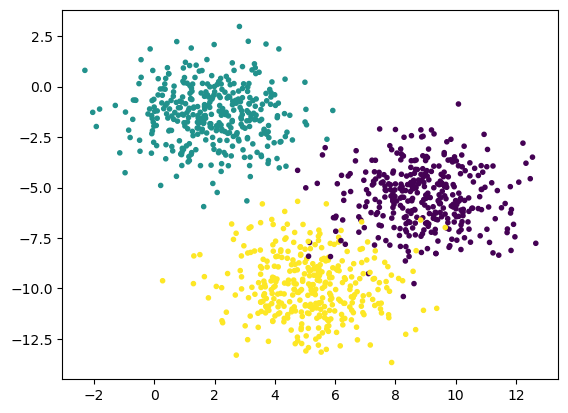

In [5]:
# Test your code here (1')

n_samples = [350,350,350]
random_state = 200
cluster_std = 1.5
centers = None

X, Y_true = make_blobs(n_samples=n_samples, centers=centers, random_state=random_state, cluster_std=cluster_std)
plt.scatter(X[:, 0], X[:, 1], marker='.', c=Y_true)


Text(0.5, 1.0, 'Cluster number = 2')

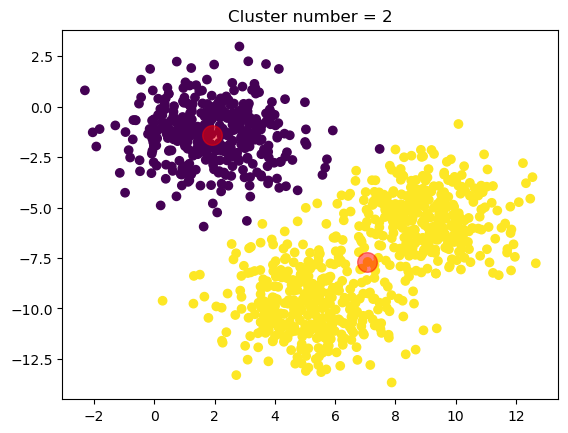

In [6]:
# Use k-means to predict each data point's cluster label
kmeans = KMeans(n_clusters=2, n_init = 10, max_iter = 300, random_state=10)
y_pred = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred)  #use predicted cluster label to color each data point
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.title("Cluster number = 2")

Based on the result above, answer the following questions based on your observation. 

__(0.5') Question 1__:  This is obviously not a successful clustering, how to fix it? <br>
Please record your answers on lab6 on SLATE quiz tool. <br>
__Ans:__ The scatter plot result above suggests that the data might be better suited for more than two clusters. Here are a few steps we can take to improve the clustering:

Determine the Optimal Number of Clusters: Use methods like the elbow method to find the most appropriate number of clusters. This involves plotting the sum of squared distances from each point to its assigned center for a range of cluster numbers and looking for the ‘elbow point’ where the rate of decrease sharply changes.
Different Clustering Algorithm: If KMeans doesn’t provide satisfactory results, consider trying a different clustering algorithm that’s better suited for the data distribution, such as DBSCAN.<br>
Hyperparameter Tuning: Experiment with different values for n_init and max_iter parameters.<br>

__(0.5') Question 2__:  What is the meaning of n_init and max_iter in this case? 
Please record your answers on lab6 on SLATE quiz tool. <br>
__Ans:__ n_init controls the number of times the algorithm will be run with different centroid seeds, and max_iter is the maximum number of iterations for a single run.

Text(0.5, 1.0, 'Anisotropicly Distributed Blobs with Labeld Centroids')

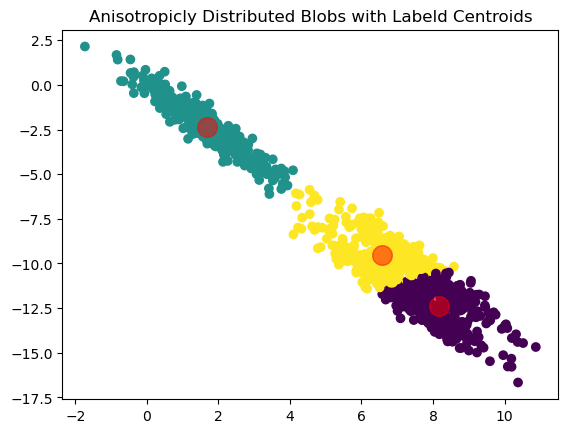

In [10]:
# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
kmeans = KMeans(n_clusters=3, n_init = 10, max_iter = 300, random_state=10)
y_pred = kmeans.fit_predict(X_aniso)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.title("Anisotropicly Distributed Blobs with Labeld Centroids")

Based on the result above, answer the following questions based on your observation. 

__(1') Question 3__:  Is this a successful clustering? If anything is wrong, how to fix it? <br>
Please record your answers on lab6 on SLATE quiz tool. <br>
__Ans:__ Based on the description of the scatter plot, the data points appears to be anisotropically distributed and form clusters that are elongated and oriented at different angles. This distribution suggests that the KMeans algorithm, which assumes isotropic clusters, may not be the best choice for this dataset.

Here is my suggestion to potentially improve the clustering:
Use a Different Algorithm, algorithms like DBSCAN or Spectral Clustering are more flexible in terms of cluster shape and might perform better on anisotropic data.

Text(0.5, 1.0, 'Blobs of Unequal Variance with Labeld Centroids')

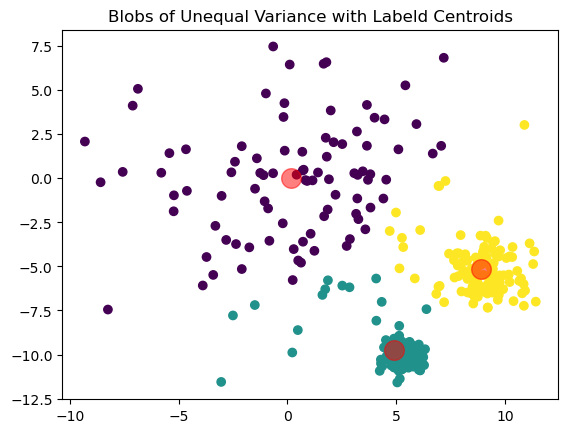

In [9]:
# Different variance
X_varied, y_varied = make_blobs(n_samples=350,
                                cluster_std=[1.0, 4, 0.5],
                                random_state=200)
kmeans = KMeans(n_clusters=3, n_init = 10, max_iter = 300, random_state=10)
y_pred = kmeans.fit_predict(X_varied)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);
plt.title("Blobs of Unequal Variance with Labeld Centroids")


Based on the result above, answer the following questions based on your observation. 

__(1') Question 4__:  Is this a successful clustering? Why? <br>
Please record your answers on lab6 on SLATE quiz tool. <br>
__Ans:__ The clustering appears to be partially successful. The KMeans algorithm has identified three clusters, which correspond to the three different standard deviations specified in the make_blobs function. However, due to the unequal variance of the blobs, the cluster with the highest variance (the purple points) is more spread out and overlaps with the other clusters. This overlap can lead to misclassification of the data points that are near the boundaries between clusters.

<br>Similar to KNN classifier, the choice of a proper K in K-means algorithm impacts the model performance significantly. In practice, there are two methods that are commonly used to evaluate the number K. They are often run in conjunction to provide the reasonable estimation of the cluster number K. <br>
<br>
1. The elbow point method. <br>
This method usually runs K-means clustering algorithm with incremental K, and record the SSE (sum of the squared error, also called inertia) after the conclusion of the algorithm with each K.  Given that K-means aims at minimizing SSE in its algorithm design, the smaller SSE indicates an objectively smaller modeling error. However, with more centroids in the model, the distance from each point to its closest centroid will decrease. This means that increasing K will decrease the SSE but also risking overfitting, it is necessary to find the optimal tradeoff between the number of clusters K and the appropriately small SSE. This sweet spot is called the elbow point where the SSE curve begin to bend.  In order to find the elbow point, you can either plot the SSE against K curve and manually find the bending point or use python package kneed. <br><br>  

2. The silhouette coefficient.<br> 
This method measures cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on how close the data point is to other points in the same cluster and how far away the data point is from points in other clusters. You can use silhouette_score()from sklearn.metrics library to compute the silhouette coefficients for a certain clustering. Please also note that this method only allows cluster size to be higher than one.  <br>  


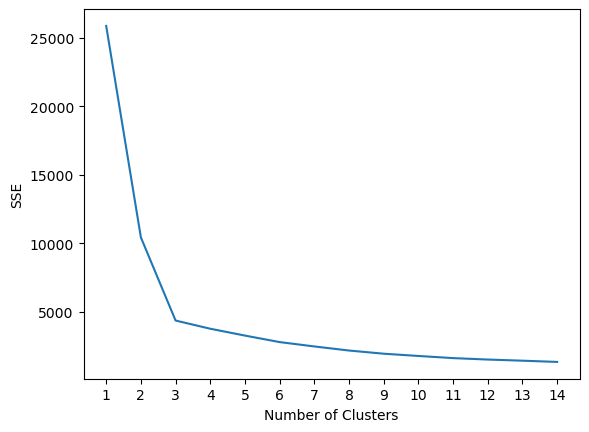

The elbow point for this K means model is: 3


In [11]:
# The elbow point method
sse = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, n_init = 10, max_iter = 300, random_state=10)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# You can plot SSE against K and manually find elbow point
plt.plot(range(1, 15), sse)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# or you can use KneeLocator to find the elbow point

kl = KneeLocator(range(1, 15), sse, curve="convex", direction="decreasing")

print("The elbow point for this K means model is:",kl.elbow)

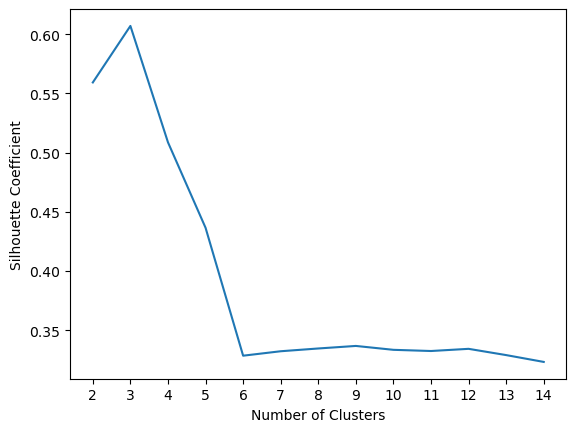

In [12]:
# The silhouette coefficient method

from sklearn.metrics import silhouette_score

silhouette_coefficients = []

# start at 2 clusters for silhouette coefficient
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, n_init = 10, max_iter = 300, random_state=10)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_coefficients.append(score)

#plt.style.use("fivethirtyeight")
plt.plot(range(2, 15), silhouette_coefficients)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

__(1') Question 5__:  Based on this information above, what is the best cluster number K? Why? <br>
Please record your answers on lab6 on SLATE quiz tool. <br>
__Ans:__ Based on the information above, it is deduced that the best number of clusters K for the dataset is 3. This conclusion is drawn from two key observations:

Elbow Method: The first graph shows the Within-Cluster-Sum-of-Squares (WCSS) against the number of clusters. There is a sharp decline in WCSS as the number of clusters increases from 1 to 3, after which the decline levels off. This leveling off suggests that increasing the number of clusters beyond 3 does not significantly improve the fit of the model. The “elbow point” at K=3 is where we typically find the optimal balance between the number of clusters and the sum of the squared distances to the nearest cluster center.<br>
Silhouette Coefficient: The second graph plots the silhouette coefficient values for different numbers of clusters. The silhouette coefficient measures how similar an object is to its own cluster compared to other clusters. The peak silhouette score at K=3 indicates that the clusters are well separated and dense, which is ideal for clustering.

These two methods are commonly used to validate the number of clusters in a dataset, and both suggest that K=3 is the optimal choice for this particular dataset. The elbow method provides a visual indication of where the benefits of adding more clusters start to diminish, while the silhouette score quantitatively measures how well each object lies within its cluster. When both methods agree on the number of clusters, it gives us confidence in the choice of K.

<a id='DBSCAN_Random_Data'></a>
<h2> 3. DBSCAN on Randomly Generated Data </h2>
<h3> Now let's move on to test DBSCAN algorithm. </h3>
DBSCAN is a density-based clustering algorithm and it can be implemented by: <br>
<ol>
    <li>Joining all neighbouring core points. </li>
    <li>Assigning border points to the cluster of its nearest core neighbor. </li>
    <li>Discard outliner and noise points </li>
</ol>

DBSCAN works with two important parameters:<br>
__eps__: the radius of the neighbourhood.<br> 
__min_samples__: minimal number of neighboring points in a neighborhood for the point to be considered a core point.<br> 
DBSCAN output is:

<h4>DBSCAN reference: <a href="https://scikit-learn.org/stable/modules/clustering.html#dbscan">click here</a></h4>


In [13]:
#DBSCAN model, setting up required parameters 
eps = 0.4
min_Samples = 10

db = DBSCAN(eps=eps, min_samples=min_Samples).fit(X)
labels = db.labels_

In [14]:
# To count number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 5
Estimated number of noise points: 502


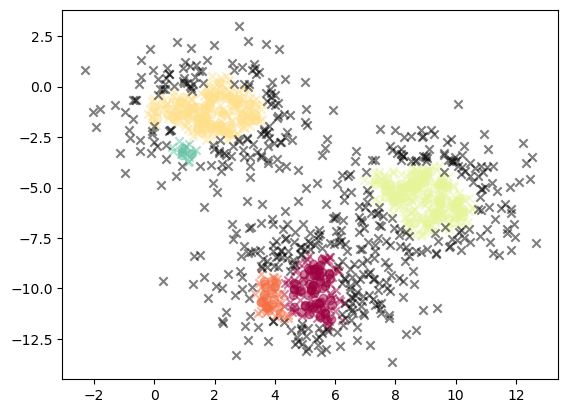

In [15]:
# Plot result
# Use black to label noise points.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise points.
        col = 'k'

    class_member_mask = (labels == k)
    
    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker=u'o', alpha=0.5)

    # Plot the border points and noise points
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker=u'x', alpha=0.5)

Based on the result above, answer the following questions based on your observation. 

__(1') Question 6__:  How to adjust eps and min_Samples to reduce the number of points identified as noise points (black)? Why? <br>
Answer:  To reduce the number of points identified as noise by the DBSCAN algorithm, you can adjust the eps and min_samples parameters. Here’s how:

Increase eps: This parameter defines the maximum distance between two samples for one to be considered as in the neighborhood of the other. By increasing eps, you expand the size of the neighborhood, which allows more points to be included in a cluster and reduces the number of noise points.
Decrease min_samples: This parameter is the number of samples in a neighborhood for a point to be considered as a core point. Lowering this value means that fewer points are needed to form a dense region, which can also decrease the number of noise points. <br> 
__(2') Task 2__: Make changes to the code to illustrate question 6 and record your code on SLATE.  

Estimated number of clusters: 3
Estimated number of noise points: 9


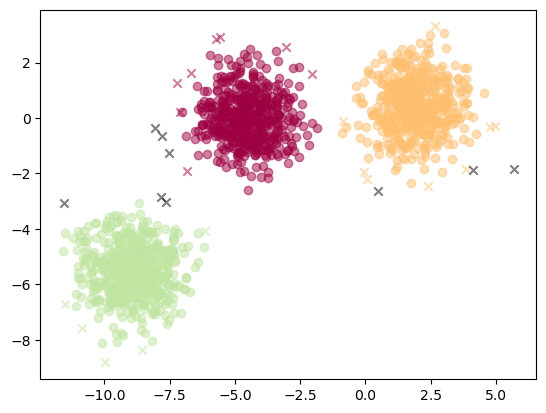

In [20]:
# Write your code here (2')
# DBSCAN model, setting up required parameters 
eps = 0.8  # Increased eps value
min_Samples = 5  # Decreased min_samples value

db = DBSCAN(eps=eps, min_samples=min_Samples).fit(X)
labels = db.labels_
# To count number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Use black to label noise points.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise points.
        col = 'k'

    class_member_mask = (labels == k)
    
    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker=u'o', alpha=0.5)

    # Plot the border points and noise points
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker=u'x', alpha=0.5)

<a id='Practice'></a>
<h2>4. Practice </h2>

Let's regenerate a non-isotropic dataset like below:

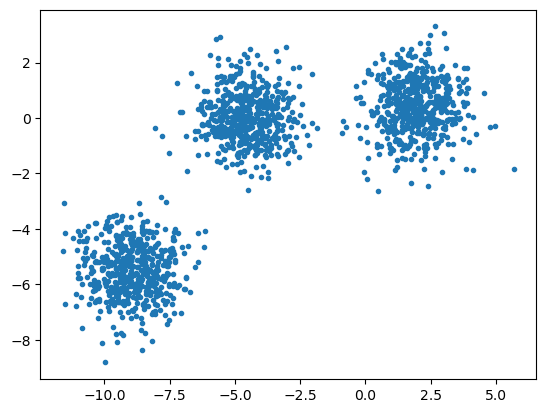

In [16]:
n_samples = [500,500,500]
random_state = 170
cluster_std = 1 
centers = None

X, y_true = make_blobs(n_samples=n_samples, centers=centers, random_state=random_state, cluster_std=cluster_std)
plt.scatter(X[:, 0], X[:, 1], marker='.')

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
# Stretch data blobs in anisotropic directions. 
X_aniso = np.dot(X, transformation)

__(2') Task 3__:In the cell below, please run DBSCAN algorithm on the anisotropic dataset below compare its result with K-means algorithm. record your code and result in SLATE Lab6 quiz tool. 

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


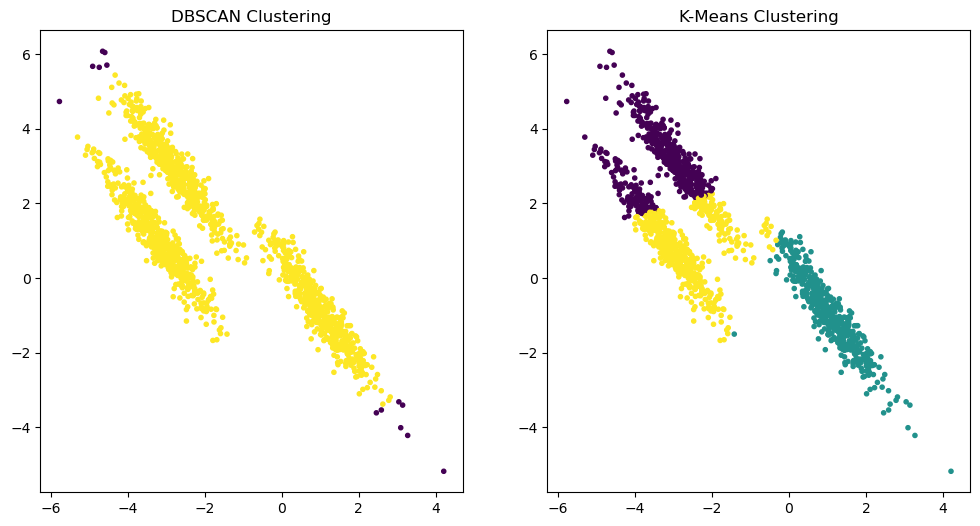

In [23]:
# Test your code here (2')
# Your anisotropic dataset
X_aniso = np.dot(X, [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]])

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_aniso)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=170)
kmeans_labels = kmeans.fit_predict(X_aniso)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=dbscan_labels, marker='.')
plt.title('DBSCAN Clustering')

plt.subplot(122)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=kmeans_labels, marker='.')
plt.title('K-Means Clustering')

plt.show()

Here’s a comparison based on the results above:

DBSCAN Clustering:
Identified a main cluster with a diagonal pattern.
Classified several points as outliers (noise).

K-Means Clustering:
Divided the data into three distinct clusters.
Each cluster is dense and well-separated.

The visual comparison indicates that DBSCAN has successfully captured the anisotropic nature of the main cluster but has also left many points as outliers. K-Means, with its spherical assumption, has forced the data into distinct, separate clusters, which may not reflect the true relationships within the data if the clusters have irregular shapes.

In practice, the choice between DBSCAN and K-Means depends on the specific characteristics of the dataset and the goals of the clustering. DBSCAN is more flexible with cluster shapes and can handle noise, while K-Means is simpler and may be preferred for its speed and ease of interpretation when the clusters are roughly spherical and evenly sized. 
For datasets like the one above, DBSCAN’s ability to handle anisotropic clusters can provide a more accurate representation of the inherent data structure.